# CSE 372 High Performance Computing : PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [2]:
hsi = io.loadmat('Salinas.mat')['salinas']

In [3]:
hsi.shape

(512, 217, 224)

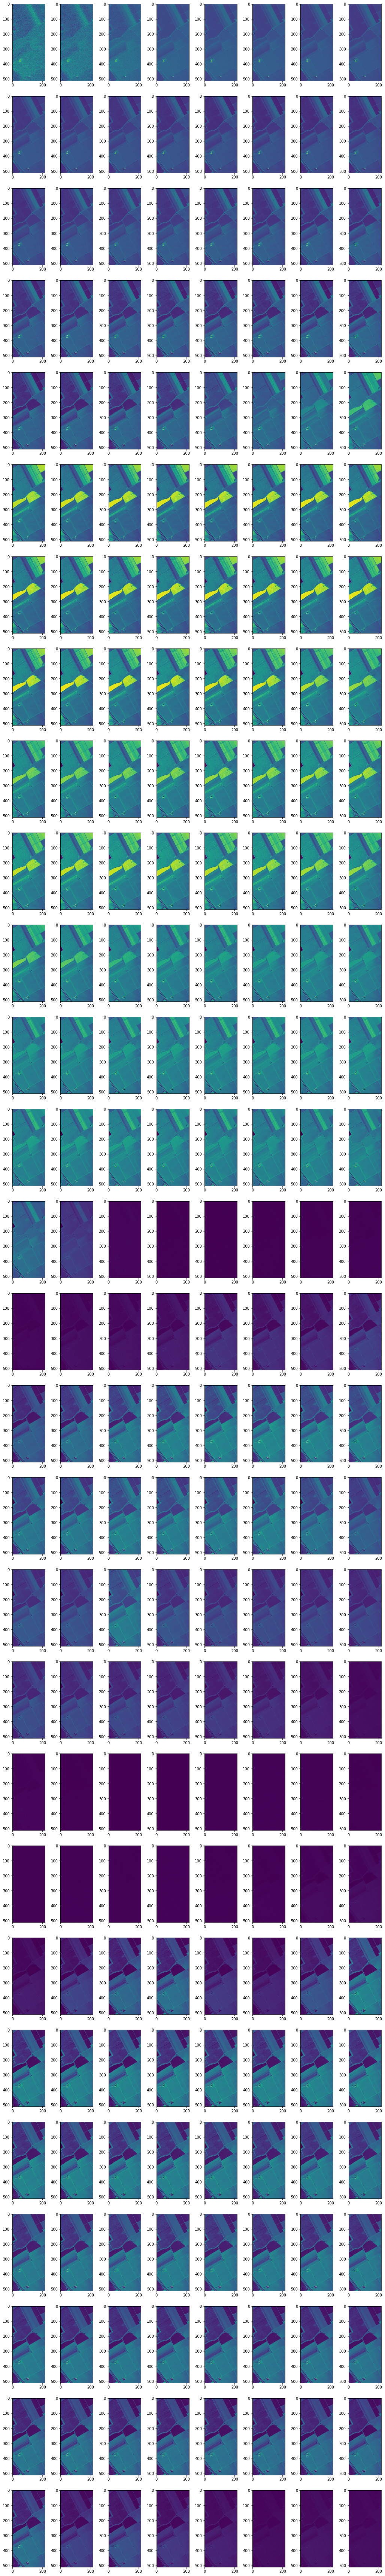

In [4]:
_, axes = plt.subplots(28, 8, figsize=(18,126))
axes = axes.flatten()
for i in range(224):
    axes[i].imshow(hsi[:,:,i])

In [5]:
hsi[:,:,0]

array([[290, 290, 290, ..., 373, 373, 305],
       [379, 308, 379, ..., 376, 376, 305],
       [369, 298, 298, ..., 447, 305, 447],
       ...,
       [379, 308, 379, ..., 367, 367, 438],
       [314, 314, 385, ..., 367, 367, 376],
       [371, 299, 299, ..., 447, 447, 376]], dtype=int16)

In [109]:
## Benchmark output (won't be used any further)
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
z = pca.fit_transform(pca_input)
print(z)

[[-6.13637278e+03 -4.38571386e+03  6.28407429e+02 ...  2.04180041e+01
  -3.83370218e+00 -3.13567179e+01]
 [-6.19694917e+03 -4.36064584e+03  5.68280593e+02 ...  9.96390514e-01
  -1.78134532e+01 -3.26274980e+01]
 [-6.35950363e+03 -4.69393958e+03  5.78031043e+02 ...  5.65452513e+00
  -3.10133715e+01 -1.20018913e+01]
 ...
 [-6.74048686e+03 -4.12719798e+03  5.95007971e+02 ...  1.04234361e+01
  -2.97709663e+01 -6.09338658e+00]
 [-6.76352778e+03 -4.13519799e+03  5.79182355e+02 ...  3.70467802e+00
  -1.73640959e+00 -4.16541391e+00]
 [-6.66408486e+03 -4.01792051e+03  5.83419721e+02 ...  1.53259674e+01
  -1.36002344e+01 -2.13335697e+01]]


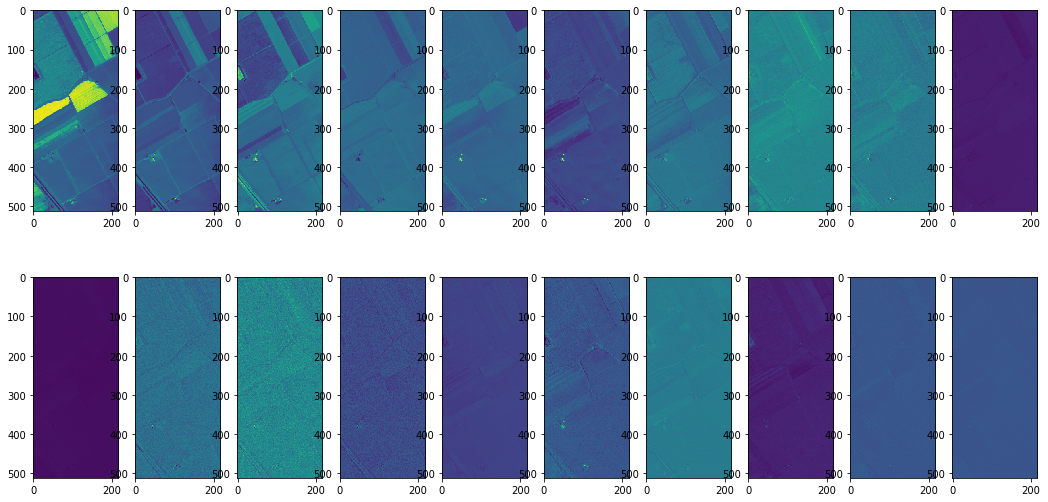

In [97]:
comp_hsi = z.reshape(512, 217, 20)
_, axes = plt.subplots(2, 10, figsize=(18,9))
axes = axes.flatten()
for i in range(20):
    axes[i].imshow(comp_hsi[:,:,i])

In [103]:
def get_pca_components_matrix(arr, n_components):
    # calculate the mean of each column
    M = np.mean(arr, axis=0, keepdims=True)
    # center columns by subtracting column means
    C = arr - M
    u, s, vh = np.linalg.svd(C, full_matrices=False)
    return vh[:n_components,:].T

In [105]:
pca_input = hsi.reshape(512*217, 224)
original_image_dimensions_mean = np.mean(pca_input, axis=0, keepdims=True)
print(pca_input.shape)
print(pca_input)
print(original_image_dimensions_mean.shape)

(111104, 224)
[[290 381 585 ...  11  17  10]
 [290 381 519 ...  11  15  16]
 [290 381 585 ...  11  11  12]
 ...
 [447 405 674 ...  11  23  10]
 [447 405 674 ...  17  27  16]
 [376 489 674 ...  15  23  12]]
(1, 224)


In [106]:
pca_vectors_matrix = get_pca_vectors_matrix(pca_input, 20)
np.save('pca_components_matrix', pca_vectors_matrix)
np.save('original_image_dimensions_mean', original_image_dimensions_mean)

(224, 224)


In [108]:
reduced_vectors = (pca_input - original_image_dimensions_mean) @ pca_vectors_matrix
print(reduced_vectors)

[[ 6.13637278e+03 -4.38571386e+03  6.28407429e+02 ...  2.04179081e+01
  -3.83422385e+00 -3.13584391e+01]
 [ 6.19694917e+03 -4.36064584e+03  5.68280593e+02 ...  9.96256915e-01
  -1.78141433e+01 -3.26307466e+01]
 [ 6.35950363e+03 -4.69393958e+03  5.78031043e+02 ...  5.65437406e+00
  -3.10142402e+01 -1.20054395e+01]
 ...
 [ 6.74048686e+03 -4.12719798e+03  5.95007971e+02 ...  1.04234021e+01
  -2.97710801e+01 -6.09361225e+00]
 [ 6.76352778e+03 -4.13519799e+03  5.79182355e+02 ...  3.70461063e+00
  -1.73685465e+00 -4.16680429e+00]
 [ 6.66408486e+03 -4.01792051e+03  5.83419721e+02 ...  1.53258950e+01
  -1.36006479e+01 -2.13358191e+01]]


Other than the signs, the above output matches the benchmark output by sklearn's PCA class.

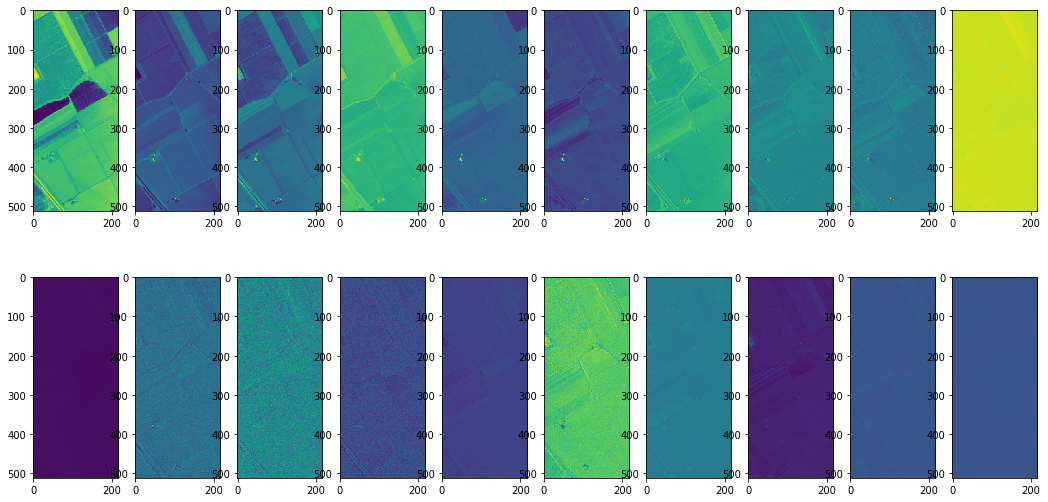

In [112]:
comp_hsi = reduced_vectors.reshape(512, 217, 20)
_, axes = plt.subplots(2, 10, figsize=(18,9))
axes = axes.flatten()
for i in range(20):
    axes[i].imshow(comp_hsi[:,:,i])

In [113]:
np.save('compressed_hsi', comp_hsi)